In [3]:
#"mode1/1-1/pub0.log"
def data_set_prepare(filename):
    data = []
    fh = open(filename)
    for  line in  fh.readlines(): 
        data.append(line)
    return data

In [52]:
broker_1_1 = data_set_prepare("mode1/1-1/broker.log")
pub_1_1 = data_set_prepare("mode1/1-1/pub0.log")
sub_1_1 = data_set_prepare("mode1/1-1/sub0.log")

In [74]:
message_num = len(sub_1_1)
print (message_num)
intervals = []
def get_pub_time(message_index):
    timestamp = pub_1_1[message_index+1].split(" ")[0]
    microsecond = timestamp.split(".")[1][:3]
    second = timestamp.split(".")[0].split(":")[-1]
    return (1000*int(second) + int(microsecond))
    

def get_sub_time(message_index):
    timestamp = sub_1_1[message_index+1].split(" ")[0]
    microsecond = timestamp.split(".")[1][:3]
    second = timestamp.split(".")[0].split(":")[-1]
    return (1000*int(second) + int(microsecond))
    
for i in range(0,message_num-1):
    intervals.append(get_sub_time(i)-get_pub_time(i))
print (intervals)

11
[2, 2, 1, 2, 1, 1, 2, 3, 0, 1]


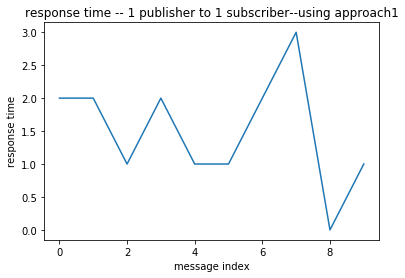

In [77]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(range(0,len(intervals)),intervals)
plt.title('response time -- 1 publisher to 1 subscriber--using approach1')
plt.xlabel('message index')
plt.ylabel('response time')
plt.show()

In [28]:
def get_pub_time_mul(pub_log, message_index):
    timestamp = pub_log[message_index+1].split(" ")[0]
    microsecond = timestamp.split(".")[1][:3]
    second = timestamp.split(".")[0].split(":")[-1]
    return (1000*int(second) + int(microsecond))

def get_sub_time_mul(sub_num, sub_index, message_index):
    sub = data_set_prepare("mode1/1-"+ str(sub_num)+"/sub" + str(sub_index)+".log")
    timestamp = sub[message_index+1].split(" ")[0]
    microsecond = timestamp.split(".")[1][:3]
    second = timestamp.split(".")[0].split(":")[-1]
    return (1000*int(second) + int(microsecond))

def get_avg_time(sub_num, message_index):
    sub_time = 0
    number = 0
    for i in range(0,sub_num):
        sub_time += get_sub_time_mul(sub_num, i, message_index)
        number += 1
    return (sub_time/number)

def get_avg_response_time(sub_num):
    pub_log = data_set_prepare("mode1/1-"+str(sub_num)+"/pub0.log")
    intervals = []
    sum_rt = 0
    for i in range(0,10):
        rt = get_avg_time(sub_num, i)-get_pub_time_mul(pub_log, i)
        intervals.append(rt)
        sum_rt += rt
    return sum_rt/len(intervals)

#print (get_avg_response_time(50))
    

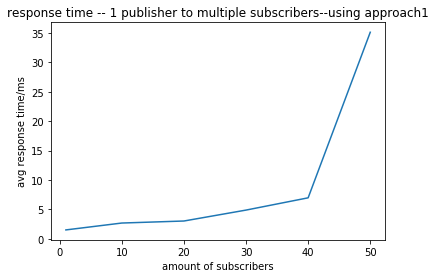

In [16]:
x = [1, 10, 20, 30, 40, 50]
y = []
import matplotlib.pyplot as plt
for i in x:
    y.append(get_avg_response_time(i))
plt.figure()
plt.plot(x,y)
plt.title('response time -- 1 publisher to multiple subscribers--using approach1')
plt.xlabel('amount of subscribers')
plt.ylabel('avg response time/ms')
plt.show()

In [25]:
def get_pub_time_size(pub_log, message_index):
    timestamp = pub_log[message_index+1].split(" ")[0]
    microsecond = timestamp.split(".")[1][:3]
    second = timestamp.split(".")[0].split(":")[-1]
    return (1000*int(second) + int(microsecond))

def get_sub_time_size(sub_size, message_index):
    sub = data_set_prepare("mode1/1-1-len="+ str(sub_size)+"/sub0.log")
    timestamp = sub[message_index+1].split(" ")[0]
    microsecond = timestamp.split(".")[1][:3]
    second = timestamp.split(".")[0].split(":")[-1]
    return (1000*int(second) + int(microsecond))

def get_avg_response_time_size(sub_size):
    pub_log = data_set_prepare("mode1/1-1-len="+ str(sub_size)+"/pub0.log")
    intervals = []
    sum_rt = 0
    for i in range(0,10):
        rt = get_sub_time_size(sub_size, i)-get_pub_time_size(pub_log, i)
        intervals.append(rt)
        sum_rt += rt
    return sum_rt/len(intervals)


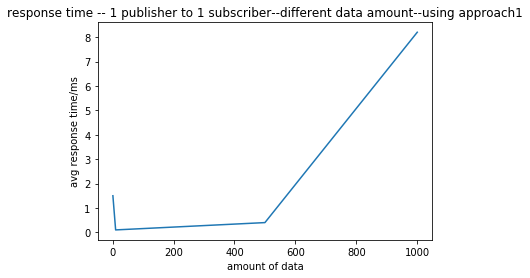

In [29]:
x = [1, 10, 500, 1000]
y = []
y.append(get_avg_response_time(1))
import matplotlib.pyplot as plt
for i in x[1:]:
    y.append(get_avg_response_time_size(i))
plt.figure()
plt.plot(x,y)
plt.title('response time -- 1 publisher to 1 subscriber--different data amount--using approach1')
plt.xlabel('amount of data')
plt.ylabel('avg response time/ms')
plt.show()